# e.g. 4: Compare SICON control v0,v1 and forecasts for Sep (SH) & Mar (NH) polar plots.

# last edited 25 July 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

BEGIN
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
cafe_files_control= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p9f1/SImon/siconc/gn/v20171025/siconc_SImon_piControl_CAFE-1-0_r1i1p9f1_gn_047101-048012.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p9f1/SImon/siconc/gn/v20171025/siconc_SImon_piControl_CAFE-1-0_r1i1p9f1_gn_048101-049012.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p9f1/SImon/siconc/gn/v20171025/siconc_SImon_piControl_CAFE-1-0_r1i1p9f1_gn_049101-050012.nc']]
cafe_monthly_files_1st= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p1f1/SImon/siconc/gn/v20171025/siconc_SImon_historical_CAFE-1-0_r2i1p1f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r3i1p1f1/SImon/siconc/gn/v20171025/siconc_SImon_historical_CAFE-1-0_r3i1p1f1_gn_201601-20201

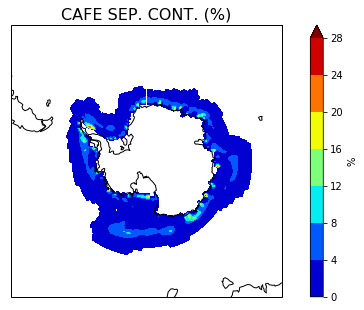

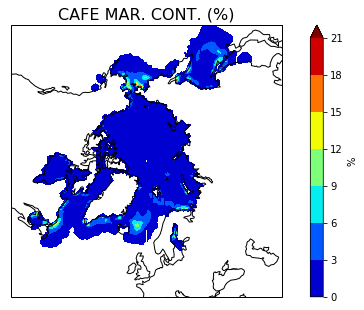

n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
Diag= False
monthly_clim_anom: All years have 12 months.
self.ls_mask.shape= (180, 360)
regrid_curv_to_rect: must be 2d ocean/seaice + multi time anomaly
self.ls_mask.shape= (180, 360)
regrid_curv_to_rect: must be 2d ocean/seaice + multi time anomaly


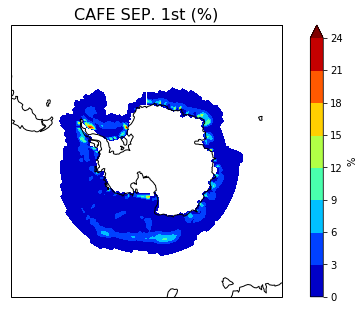

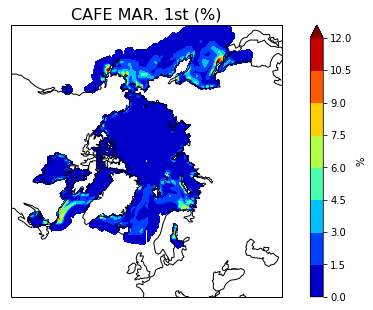

n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
Diag= False
monthly_clim_anom: All years have 12 months.
self.ls_mask.shape= (180, 360)
regrid_curv_to_rect: must be 2d ocean/seaice + multi time anomaly
self.ls_mask.shape= (180, 360)
regrid_curv_to_rect: must be 2d ocean/seaice + multi time anomaly


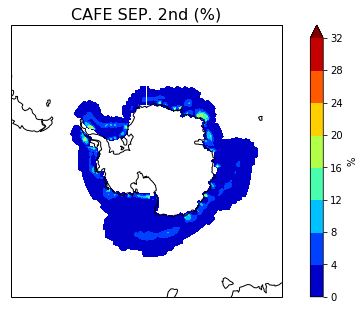

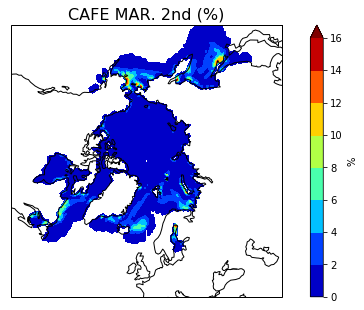

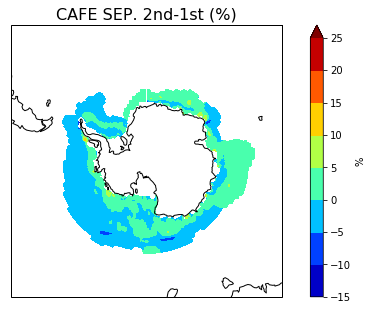

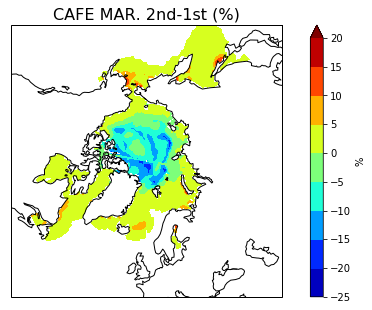

END


In [1]:
print('BEGIN')

import socket
import re
import os

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-32-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  %matplotlib inline

  __file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

  import sys
  import inspect
#   from decadal_diag import n_data_funcs  
  import cartopy.crs as ccrs
  from cartopy.util import add_cyclic_point
  import numpy as np
  import numpy.ma as ma
  
  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number
  
  from n_data_funcs import n_data_funcs
  
  model='CAFE'
  
  cafe_control_calendar='noleap'
  grid_label='gn'
    
  cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', 5:'v2', 6:'v3', 7:'aug17p'}
  
  pval=9

  ivar_str_cafe='siconc';scale=1.0;offset=0.0;long_name='Seaice concentration';short_name='SICON';units='%';table='SImon'

  idir_control=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'

  ifils_control= \
    [ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_046101-047012.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_047101-048012.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_048101-049012.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_049101-050012.nc' \
    ]

  #no ensembles 3 input files...
  cafe_files_control=[[idir_control+'/'+ifils_control[1],idir_control+'/'+ifils_control[2], idir_control+'/'+ifils_control[3]]]

  print('cafe_files_control=',cafe_files_control)

  pval_1st=1 #v1_forecast
  cafe_monthly_files_1st,cafe_monthly_files_flat_1st=[],[]
  for ensemble in range(2,3+1):
    cafe_inner_monthly_files_1st=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_1st)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils_1st=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_1st)+'f1_gn_201601-202012.nc'] #1 file
    for file in monthly_ifils_1st:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files_1st.append(idir+'/'+file)
    cafe_monthly_files_1st.append(cafe_inner_monthly_files_1st)

  print('cafe_monthly_files_1st=',cafe_monthly_files_1st)

  pval_2nd=4 #v0_forecast
  cafe_monthly_files_2nd,cafe_monthly_files_flat_2nd=[],[]
  for ensemble in range(2,3+1):
    cafe_inner_monthly_files_2nd=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils_2nd=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1_gn_201601-202012.nc'] #1 file
    for file in monthly_ifils_2nd:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files_2nd.append(idir+'/'+file)
    cafe_monthly_files_2nd.append(cafe_inner_monthly_files_2nd)

  print('cafe_monthly_files_2nd=',cafe_monthly_files_2nd)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple
    
  if(sys.version_info.major==2):
    from decadal_diag_py2 import shade_2d_polar
  elif(sys.version_info.major==3):
    from decadal_diag_py3 import shade_2d_polar
  else:
    raise SystemExit('Not ready for this version of python:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  grid_label='cafep'
  cafe_calendar='julian'
  
  clevs=None
    
#===============================================================================

  cbeg=471
  cend=500
  abeg=471
  aend=500
  
  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  
  cafe_monthly_files_control=n_data_funcs(Diag=False,input_files=cafe_files_control,input_var_name=ivar_str_cafe)

  cafe_monthly_files_control.calculate_filedatetime_info(Diag=False,calendar=cafe_control_calendar)

  cafe_monthly_files_control.get_latlon_info(Diag=False, lat='latitude',lon='longitude')

  cafe_siconc_from_monthly_control=cafe_monthly_files_control.calculate_quantity('dummy', Diag=False, quantity='msftyz')
  
  cafe_siconc_annual_climatology_from_monthly_control, \
  cafe_siconc_annual_anomaly_from_monthly_control=cafe_monthly_files_control.monthly_clim_anom( \
    Diag=False, input=cafe_siconc_from_monthly_control, AnnOut=True, ZeroClim=False)
  
  month_list=[]
  for d,date_time_stamp_now in enumerate(cafe_monthly_files_control.date_time_stamp_tfreq):
    month_list.append(date_time_stamp_now.month)
  npmonth_list=np.array(month_list)
  mar_months,=np.where(npmonth_list==3) #note comma
  sep_months,=np.where(npmonth_list==9) #note comma
  mar_average=np.average(cafe_siconc_from_monthly_control[mar_months,],axis=0)
  sep_average=np.average(cafe_siconc_from_monthly_control[sep_months,],axis=0)

  cafe_monthly_files_control.regrid_curv_to_rect_setup( \
    Diag=False, topdir='/OSM/CBR/OA_DCFP/data/CAFEPP', outmask=False, interpolate='1x1o2d', )  
  cafe_monthly_files_control.regrid_curv_to_rect_weights_mask(Diag=False)
  mar_average_regrid=cafe_monthly_files_control.regrid_curv_to_rect( \
    Diag=False, apply_lsmask=False, input=mar_average)
  sep_average_regrid=cafe_monthly_files_control.regrid_curv_to_rect( \
    Diag=False, apply_lsmask=False, input=sep_average)
        
  cyclic_data, cyclic_lons = sep_average_regrid,cafe_monthly_files_control.lon_regrid #original
  shade_2d_polar(cyclic_data*scale+offset, \
    xyvals=(cyclic_lons,cafe_monthly_files_control.lat_regrid[:]), \
    xlim=(-180,180), ylim=(-90,-45), \
    clevs=clevs, title=model+' SEP. CONT.', \
    units=units, extend='max', cmap='jet', grid=True, coast=True, xysize=(10,5))

  cyclic_data, cyclic_lons = mar_average_regrid,cafe_monthly_files_control.lon_regrid #original
  shade_2d_polar(cyclic_data*scale+offset, \
    xyvals=(cyclic_lons,cafe_monthly_files_control.lat_regrid[:]), \
    xlim=(-180,180), ylim=(45,90), \
    clevs=clevs, title=model+' MAR. CONT.', \
    units=units, extend='max', cmap='jet', grid=True, coast=True, xysize=(10,5))
  
#===============================================================================

  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  ensemble_to_plot=1 #base 0
  
  cbeg=2016
  cend=2020
  abeg=2016
  aend=2020
  
  cafe_monthly_files_1st=n_data_funcs(input_files=cafe_monthly_files_1st,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files_1st.calculate_filedatetime_info(Diag=False,calendar=cafe_calendar)
  
  cafe_monthly_files_1st.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_siconc_from_monthly_1st=cafe_monthly_files_1st.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_siconc_annual_climatology_from_monthly_1st,cafe_siconc_annual_anomaly_from_monthly_1st=cafe_monthly_files_1st.monthly_clim_anom( \
    Diag=False, input=cafe_siconc_from_monthly_1st, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  month_list=[]
  for d,date_time_stamp_now in enumerate(cafe_monthly_files_1st.date_time_stamp_tfreq[0]):
    month_list.append(date_time_stamp_now.month)
  npmonth_list=np.array(month_list)
  mar_months,=np.where(npmonth_list==3) #note comma
  sep_months,=np.where(npmonth_list==9) #note comma
  mar_average=np.average(cafe_siconc_from_monthly_1st[mar_months,],axis=0)
  sep_average=np.average(cafe_siconc_from_monthly_1st[sep_months,],axis=0)

  cafe_monthly_files_1st.regrid_curv_to_rect_setup( \
    Diag=False, topdir='/OSM/CBR/OA_DCFP/data/CAFEPP', outmask=False, interpolate='1x1o2d', )  
  cafe_monthly_files_1st.regrid_curv_to_rect_weights_mask(Diag=False)
  mar_average_regrid_1st=cafe_monthly_files_1st.regrid_curv_to_rect( \
    Diag=False, apply_lsmask=False, input=mar_average)
  sep_average_regrid_1st=cafe_monthly_files_1st.regrid_curv_to_rect( \
    Diag=False, apply_lsmask=False, input=sep_average)
        
  clevs=None
  cyclic_data, cyclic_lons = np.average(sep_average_regrid_1st,axis=0),cafe_monthly_files_1st.lon_regrid #original
  shade_2d_polar(cyclic_data*scale+offset, \
    xyvals=(cyclic_lons,cafe_monthly_files_1st.lat_regrid[:]), \
    xlim=(-180,180), ylim=(-90,-45), \
    clevs=clevs, title=model+' SEP. 1st', \
    units=units, extend='max', cmap='jet', grid=True, coast=True, xysize=(10,5))

  cyclic_data, cyclic_lons = np.average(mar_average_regrid_1st,axis=0),cafe_monthly_files_1st.lon_regrid #original
  shade_2d_polar(cyclic_data*scale+offset, \
    xyvals=(cyclic_lons,cafe_monthly_files_1st.lat_regrid[:]), \
    xlim=(-180,180), ylim=(45,90), \
    clevs=clevs, title=model+' MAR. 1st', \
    units=units, extend='max', cmap='jet', grid=True, coast=True, xysize=(10,5))
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cafe_monthly_files_2nd=n_data_funcs(input_files=cafe_monthly_files_2nd,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files_2nd.calculate_filedatetime_info(Diag=False,calendar=cafe_calendar)
  
  cafe_monthly_files_2nd.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_siconc_from_monthly_2nd=cafe_monthly_files_2nd.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_siconc_annual_climatology_from_monthly_2nd,cafe_siconc_annual_anomaly_from_monthly_2nd=cafe_monthly_files_2nd.monthly_clim_anom( \
    Diag=False, input=cafe_siconc_from_monthly_2nd, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  month_list=[]
  for d,date_time_stamp_now in enumerate(cafe_monthly_files_2nd.date_time_stamp_tfreq[0]):
    month_list.append(date_time_stamp_now.month)
  npmonth_list=np.array(month_list)
  mar_months,=np.where(npmonth_list==3) #note comma
  sep_months,=np.where(npmonth_list==9) #note comma
  mar_average=np.average(cafe_siconc_from_monthly_2nd[mar_months,],axis=0)
  sep_average=np.average(cafe_siconc_from_monthly_2nd[sep_months,],axis=0)

  cafe_monthly_files_2nd.regrid_curv_to_rect_setup( \
    Diag=False, topdir='/OSM/CBR/OA_DCFP/data/CAFEPP', outmask=False, interpolate='1x1o2d', )  
  cafe_monthly_files_2nd.regrid_curv_to_rect_weights_mask(Diag=False)
  mar_average_regrid_2nd=cafe_monthly_files_2nd.regrid_curv_to_rect( \
    Diag=False, apply_lsmask=False, input=mar_average)
  sep_average_regrid_2nd=cafe_monthly_files_2nd.regrid_curv_to_rect( \
    Diag=False, apply_lsmask=False, input=sep_average)
        
  cyclic_data, cyclic_lons = np.average(sep_average_regrid_2nd,axis=0),cafe_monthly_files_2nd.lon_regrid
  shade_2d_polar(cyclic_data*scale+offset, \
    xyvals=(cyclic_lons,cafe_monthly_files_2nd.lat_regrid[:]), \
    xlim=(-180,180), ylim=(-90,-45), \
    clevs=clevs, title=model+' SEP. 2nd', \
    units=units, extend='max', cmap='jet', grid=True, coast=True, xysize=(10,5))

  cyclic_data, cyclic_lons = np.average(mar_average_regrid_2nd,axis=0),cafe_monthly_files_2nd.lon_regrid
  shade_2d_polar(cyclic_data*scale+offset, \
    xyvals=(cyclic_lons,cafe_monthly_files_2nd.lat_regrid[:]), \
    xlim=(-180,180), ylim=(45,90), \
    clevs=clevs, title=model+' MAR. 2nd', \
    units=units, extend='max', cmap='jet', grid=True, coast=True, xysize=(10,5))
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  cyclic_data, cyclic_lons = np.average(sep_average_regrid_2nd-sep_average_regrid_1st,axis=0),cafe_monthly_files_2nd.lon_regrid
  shade_2d_polar(ma.masked_where(cyclic_data*scale+offset==0,cyclic_data*scale+offset), \
    xyvals=(cyclic_lons,cafe_monthly_files_2nd.lat_regrid[:]), \
    xlim=(-180,180), ylim=(-90,-45), \
    clevs=clevs, title=model+' SEP. 2nd-1st', \
    units=units, extend='max', cmap='jet', grid=True, coast=True, xysize=(10,5))

  cyclic_data, cyclic_lons = np.average(mar_average_regrid_2nd-sep_average_regrid_1st,axis=0),cafe_monthly_files_2nd.lon_regrid
  shade_2d_polar(ma.masked_where(cyclic_data*scale+offset==0,cyclic_data*scale+offset), \
    xyvals=(cyclic_lons,cafe_monthly_files_2nd.lat_regrid[:]), \
    xlim=(-180,180), ylim=(45,90), \
    clevs=clevs, title=model+' MAR. 2nd-1st', \
    units=units, extend='max', cmap='jet', grid=True, coast=True, xysize=(10,5))
  
#===============================================================================

print('END')